In [1263]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd

In [1264]:
#download data from this website

In [1265]:
#https://ca.investing.com/crypto/bitcoin/btc-cad-historical-data

# Read Data

In [1266]:
btc = pd.read_csv('BTC_CAD Kraken Historical Data.csv')

# Data Cleaning

In [1267]:
btc.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [1268]:
btc['Price'].shape[0]

331

In [1269]:
price= [btc['Price'][i].split(',')[0]+btc['Price'][i].split(',')[1] for i in range(btc['Price'].shape[0])]

In [1270]:
btc2 = pd.Series(price).astype(float)

In [1271]:
btc2

0      70250.4
1      68623.4
2      74687.4
3      72502.2
4      72897.7
        ...   
326    40877.0
327    39000.0
328    40155.1
329    39396.8
330    36600.6
Length: 331, dtype: float64

# Reverese the data

In [1272]:
#its just how this data is from the website 

In [1273]:
btc2_r= pd.Series(btc2).loc[::-1].reset_index(drop=True)

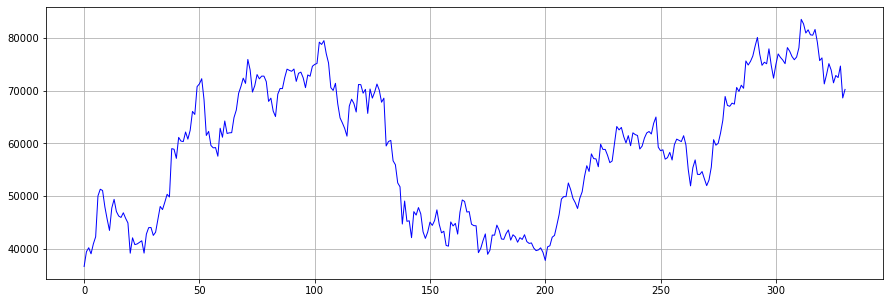

In [1274]:
plt.figure(figsize=(15,5))
btc2_r.plot(c='blue',linewidth=1)
plt.grid()
plt.show()

In [1275]:
#target is from the 5th as we predict the 5th of the sequence we are createing below

In [1276]:
target_btc = np.array(btc2_r[5:])

In [1277]:
target_btc.shape

(326,)

In [1278]:
target_btc[-1]

70250.4

In [1279]:
len(btc2)

331

# Standardise the data

In [1280]:
from sklearn.preprocessing import MinMaxScaler

In [1281]:
from sklearn.preprocessing import StandardScaler

In [1282]:
scaler3=MinMaxScaler()

In [1283]:
#Using this scaler but you can check with both

In [1284]:
scaler3=StandardScaler()

In [1285]:
btc2

0      70250.4
1      68623.4
2      74687.4
3      72502.2
4      72897.7
        ...   
326    40877.0
327    39000.0
328    40155.1
329    39396.8
330    36600.6
Length: 331, dtype: float64

In [1286]:
btc_s=scaler3.fit_transform(np.array(btc2_r).reshape(-1, 1))

In [1287]:
#we recieved an array

In [1288]:
btc_s[:4]

array([[-1.75736565],
       [-1.53685622],
       [-1.47705639],
       [-1.56814803]])

In [1289]:
#create a list from array

In [1290]:
btc_s1= [i[0] for i in btc_s]

In [1291]:
btc_s1=pd.Series(btc_s1)

In [1292]:
#Scaled data ready to be modeled

In [1293]:
btc_s1

0     -1.757366
1     -1.536856
2     -1.477056
3     -1.568148
4     -1.420127
         ...   
326    1.105038
327    1.073849
328    1.246174
329    0.767965
330    0.896271
Length: 331, dtype: float64

# Create Time Series Sequence for LSTM

In [1294]:
k=[]
btc_series_s=[]
c=0
for s in range(len(btc2)-4):    
    for i in range(5): 
        #print(btc_s1.loc[c])
        k.append(btc_s1.loc[c]) 
        c=c+1
    btc_series_s.append(k) 
    c=c-4
    k=[]
print(btc_series_s)

[[-1.7573656472789825, -1.5368562247886053, -1.4770563910590966, -1.5681480275366855, -1.420127075525228], [-1.5368562247886053, -1.4770563910590966, -1.5681480275366855, -1.420127075525228, -1.3129242613726573], [-1.4770563910590966, -1.5681480275366855, -1.420127075525228, -1.3129242613726573, -0.7007231678403476], [-1.5681480275366855, -1.420127075525228, -1.3129242613726573, -0.7007231678403476, -0.6000263358619617], [-1.420127075525228, -1.3129242613726573, -0.7007231678403476, -0.6000263358619617, -0.6188739690696007], [-1.3129242613726573, -0.7007231678403476, -0.6000263358619617, -0.6188739690696007, -0.8653521179837245], [-0.7007231678403476, -0.6000263358619617, -0.6188739690696007, -0.8653521179837245, -1.05042956725154], [-0.6000263358619617, -0.6188739690696007, -0.8653521179837245, -1.05042956725154, -1.2174716453286145], [-0.6188739690696007, -0.8653521179837245, -1.05042956725154, -1.2174716453286145, -0.8812188284497372], [-0.8653521179837245, -1.05042956725154, -1.217

In [1295]:
#We got this sequence for LSTM

In [1296]:
btc_series_s

[[-1.7573656472789825,
  -1.5368562247886053,
  -1.4770563910590966,
  -1.5681480275366855,
  -1.420127075525228],
 [-1.5368562247886053,
  -1.4770563910590966,
  -1.5681480275366855,
  -1.420127075525228,
  -1.3129242613726573],
 [-1.4770563910590966,
  -1.5681480275366855,
  -1.420127075525228,
  -1.3129242613726573,
  -0.7007231678403476],
 [-1.5681480275366855,
  -1.420127075525228,
  -1.3129242613726573,
  -0.7007231678403476,
  -0.6000263358619617],
 [-1.420127075525228,
  -1.3129242613726573,
  -0.7007231678403476,
  -0.6000263358619617,
  -0.6188739690696007],
 [-1.3129242613726573,
  -0.7007231678403476,
  -0.6000263358619617,
  -0.6188739690696007,
  -0.8653521179837245],
 [-0.7007231678403476,
  -0.6000263358619617,
  -0.6188739690696007,
  -0.8653521179837245,
  -1.05042956725154],
 [-0.6000263358619617,
  -0.6188739690696007,
  -0.8653521179837245,
  -1.05042956725154,
  -1.2174716453286145],
 [-0.6188739690696007,
  -0.8653521179837245,
  -1.05042956725154,
  -1.217471645

In [1297]:
#target is the orginal data starting from 5th till the last

In [1298]:
btc_s1.head(15)

0    -1.757366
1    -1.536856
2    -1.477056
3    -1.568148
4    -1.420127
5    -1.312924
6    -0.700723
7    -0.600026
8    -0.618874
9    -0.865352
10   -1.050430
11   -1.217472
12   -0.881219
13   -0.752022
14   -0.934655
dtype: float64

In [1299]:
target_btc_s1 = np.array(btc_s1[5:len(btc2)])

In [1300]:
target_btc_s1.shape

(326,)

In [1301]:
target_btc_s1

array([-1.31292426e+00, -7.00723168e-01, -6.00026336e-01, -6.18873969e-01,
       -8.65352118e-01, -1.05042957e+00, -1.21747165e+00, -8.81218828e-01,
       -7.52021852e-01, -9.34654629e-01, -1.00165442e+00, -1.02315176e+00,
       -9.52871379e-01, -1.03584828e+00, -1.10534006e+00, -1.55870055e+00,
       -1.32824684e+00, -1.43014235e+00, -1.42002456e+00, -1.39568035e+00,
       -1.37259792e+00, -1.55720221e+00, -1.27224019e+00, -1.17577816e+00,
       -1.17370413e+00, -1.29213666e+00, -1.24367695e+00, -1.05555549e+00,
       -8.58420290e-01, -9.04805971e-01, -7.94038667e-01, -6.75621906e-01,
       -7.16487360e-01,  8.26328233e-03, -4.82334923e-04, -1.37415516e-01,
        1.77000859e-01,  1.21751270e-01,  1.14456683e-01,  2.57485773e-01,
        1.50693033e-01,  2.84400824e-01,  5.66657932e-01,  5.20903133e-01,
        9.37798585e-01,  9.79121430e-01,  1.05668851e+00,  7.42690094e-01,
        2.05508890e-01,  2.67051538e-01,  5.57608952e-02,  2.01475431e-02,
        2.41063347e-02, -

In [1302]:
# Convert the series into array and reshape it

In [1303]:
btc_data_s1 = np.array(btc_series_s[:-1])

In [1304]:
btc_data_s1

array([[-1.75736565, -1.53685622, -1.47705639, -1.56814803, -1.42012708],
       [-1.53685622, -1.47705639, -1.56814803, -1.42012708, -1.31292426],
       [-1.47705639, -1.56814803, -1.42012708, -1.31292426, -0.70072317],
       ...,
       [ 1.28233174,  1.18537289,  0.99466481,  1.10503781,  1.07384853],
       [ 1.18537289,  0.99466481,  1.10503781,  1.07384853,  1.24617425],
       [ 0.99466481,  1.10503781,  1.07384853,  1.24617425,  0.76796485]])

In [1305]:
#reshape the target 

In [1306]:
target_btc_s2 =target_btc_s1.reshape(-1,1)

In [1307]:
target_btc_s2.shape

(326, 1)

In [1308]:
x_train, x_test, y_train, y_test = train_test_split(btc_data_s1,target_btc_s2,test_size=0.2,shuffle=False,stratify=None)

# Creating the Model and Fitting

In [1398]:
model=Sequential()
model.add(LSTM((30), batch_input_shape=(None,5,1), return_sequences=True,dropout=0.2))
model.add(LSTM((10), batch_input_shape=(None,5,1), return_sequences=True,dropout=0.0))
model.add(LSTM((5), batch_input_shape=(None,5,1), return_sequences=True,dropout=0.2))
model.add(LSTM((5), batch_input_shape=(None,5,1), return_sequences=False,dropout=0.0))
#model.add(Dense((10)))
model.add(Dense((1)))
#model.add(LSTM((1), return_sequences=False))
model.compile(loss = 'mean_absolute_error', optimizer='adam', metrics=['mse'])

In [1399]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_251 (LSTM)              (None, 5, 30)             3840      
_________________________________________________________________
lstm_252 (LSTM)              (None, 5, 10)             1640      
_________________________________________________________________
lstm_253 (LSTM)              (None, 5, 5)              320       
_________________________________________________________________
lstm_254 (LSTM)              (None, 5)                 220       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 6         
Total params: 6,026
Trainable params: 6,026
Non-trainable params: 0
_________________________________________________________________


In [1400]:
x_train.shape,x_test.shape

((260, 5), (66, 5))

In [1401]:
history =model.fit(x_train.reshape(x_train.shape[0],5,1),y_train,epochs=250,\
                     validation_data=(x_test.reshape(x_test.shape[0], 5,1),y_test))

Epoch 1/250
9/9 [==============================] - 16s 375ms/step - loss: 0.7919 - mse: 0.8548 - val_loss: 1.0797 - val_mse: 1.4022
Epoch 2/250
9/9 [==============================] - 0s 28ms/step - loss: 0.7496 - mse: 0.7781 - val_loss: 1.0767 - val_mse: 1.3935
Epoch 3/250
9/9 [==============================] - 0s 27ms/step - loss: 0.7700 - mse: 0.8056 - val_loss: 1.0721 - val_mse: 1.3814
Epoch 4/250
9/9 [==============================] - 0s 28ms/step - loss: 0.7372 - mse: 0.7379 - val_loss: 1.0587 - val_mse: 1.3473
Epoch 5/250
9/9 [==============================] - 0s 26ms/step - loss: 0.7192 - mse: 0.6927 - val_loss: 1.0245 - val_mse: 1.2619
Epoch 6/250
9/9 [==============================] - 0s 28ms/step - loss: 0.6772 - mse: 0.6101 - val_loss: 0.9829 - val_mse: 1.1646
Epoch 7/250
9/9 [==============================] - 0s 30ms/step - loss: 0.5778 - mse: 0.4499 - val_loss: 0.9496 - val_mse: 1.0929
Epoch 8/250
9/9 [==============================] - 0s 26ms/step - loss: 0.5328 - mse: 0.

9/9 [==============================] - 0s 29ms/step - loss: 0.2337 - mse: 0.0913 - val_loss: 0.2393 - val_mse: 0.0874
Epoch 64/250
9/9 [==============================] - 0s 28ms/step - loss: 0.2257 - mse: 0.0871 - val_loss: 0.3067 - val_mse: 0.1368
Epoch 65/250
9/9 [==============================] - 0s 29ms/step - loss: 0.2208 - mse: 0.0767 - val_loss: 0.2878 - val_mse: 0.1223
Epoch 66/250
9/9 [==============================] - 0s 28ms/step - loss: 0.2408 - mse: 0.0973 - val_loss: 0.2338 - val_mse: 0.0862
Epoch 67/250
9/9 [==============================] - 0s 26ms/step - loss: 0.2148 - mse: 0.0821 - val_loss: 0.2501 - val_mse: 0.0949
Epoch 68/250
9/9 [==============================] - 0s 25ms/step - loss: 0.2164 - mse: 0.0862 - val_loss: 0.2550 - val_mse: 0.0991
Epoch 69/250
9/9 [==============================] - 0s 31ms/step - loss: 0.2459 - mse: 0.0979 - val_loss: 0.2209 - val_mse: 0.0773
Epoch 70/250
9/9 [==============================] - 0s 25ms/step - loss: 0.2132 - mse: 0.0778 - 

9/9 [==============================] - 0s 29ms/step - loss: 0.1819 - mse: 0.0613 - val_loss: 0.2529 - val_mse: 0.0947
Epoch 126/250
9/9 [==============================] - 0s 32ms/step - loss: 0.2017 - mse: 0.0728 - val_loss: 0.2603 - val_mse: 0.1000
Epoch 127/250
9/9 [==============================] - 0s 24ms/step - loss: 0.1987 - mse: 0.0703 - val_loss: 0.2286 - val_mse: 0.0782
Epoch 128/250
9/9 [==============================] - 0s 29ms/step - loss: 0.2144 - mse: 0.0739 - val_loss: 0.2215 - val_mse: 0.0747
Epoch 129/250
9/9 [==============================] - 0s 24ms/step - loss: 0.1999 - mse: 0.0734 - val_loss: 0.2282 - val_mse: 0.0794
Epoch 130/250
9/9 [==============================] - 0s 34ms/step - loss: 0.2192 - mse: 0.0841 - val_loss: 0.2408 - val_mse: 0.0853
Epoch 131/250
9/9 [==============================] - 0s 29ms/step - loss: 0.2027 - mse: 0.0763 - val_loss: 0.2075 - val_mse: 0.0657
Epoch 132/250
9/9 [==============================] - 0s 28ms/step - loss: 0.2019 - mse: 0.

9/9 [==============================] - 0s 25ms/step - loss: 0.2040 - mse: 0.0726 - val_loss: 0.2909 - val_mse: 0.1199
Epoch 188/250
9/9 [==============================] - 0s 26ms/step - loss: 0.1968 - mse: 0.0774 - val_loss: 0.2390 - val_mse: 0.0837
Epoch 189/250
9/9 [==============================] - 0s 25ms/step - loss: 0.2036 - mse: 0.0713 - val_loss: 0.2297 - val_mse: 0.0769
Epoch 190/250
9/9 [==============================] - 0s 28ms/step - loss: 0.1979 - mse: 0.0699 - val_loss: 0.2655 - val_mse: 0.1006
Epoch 191/250
9/9 [==============================] - 0s 22ms/step - loss: 0.1877 - mse: 0.0634 - val_loss: 0.2447 - val_mse: 0.0870
Epoch 192/250
9/9 [==============================] - 0s 30ms/step - loss: 0.1994 - mse: 0.0713 - val_loss: 0.2676 - val_mse: 0.1033
Epoch 193/250
9/9 [==============================] - 0s 24ms/step - loss: 0.1813 - mse: 0.0563 - val_loss: 0.3074 - val_mse: 0.1315
Epoch 194/250
9/9 [==============================] - 0s 24ms/step - loss: 0.2111 - mse: 0.

9/9 [==============================] - 0s 31ms/step - loss: 0.1920 - mse: 0.0658 - val_loss: 0.2559 - val_mse: 0.0930
Epoch 250/250
9/9 [==============================] - 0s 30ms/step - loss: 0.1806 - mse: 0.0589 - val_loss: 0.2553 - val_mse: 0.0929


# Check the Results and Loss

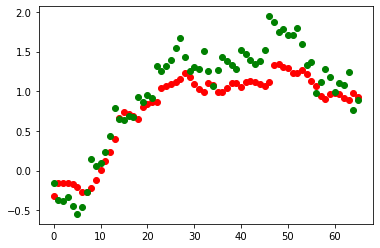

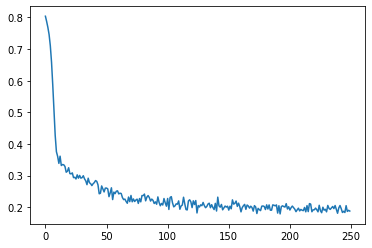

In [1402]:
results = model.predict(x_test.reshape(66, 5,1))
plt.scatter(range(x_test.shape[0]), results,c='r')
plt.scatter(range(x_test.shape[0]), y_test, c='g')
plt.show()
plt.plot(history.history['loss'])

# Metrics

In [1403]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1404]:
mean_squared_error(y_test, results)

0.09288295514541316

In [1405]:
#best model is 1 and negative is model giving very bad results
r2_score(y_test, results)

0.78159408074468

# Making Future Predictions

In [1355]:
btc_data_s1.shape

(326, 5)

In [1356]:
len_sequences = btc_data_s1.shape[0]
len_sequences

326

In [1319]:
#make a list of future prediction - future btc

#1 - make a list of the last sequence = listn   - listn=btc_data_s1[325].tolist()
#2 - make last sequence prediction  = pred 
#3 - add last prediction to list = pred=model.predict(new_array)
#4 - add the prediction to future btc list = future_btc.append(pred.tolist()[0][0])
#5 update the list of sequence with removing the ist value[0] and starting from [1] = listn=listn[1:]

In [1320]:
f=[]
future_btc=[]
listn=btc_data_s1[len_sequences-1].tolist()
print(listn)
start_pred=model.predict(btc_data_s1[len_sequences-1].reshape(-1, 5,1))[0][0]
#print(start_pred)
for i in range(50):
    #listn.pop()
    #listn.append(start_pred)
    new_array=np.array(listn).reshape(-1,5,1)
    #print(new_array)
    pred=model.predict(new_array)
    #print(pred,"PPP")
    print(pred.tolist())
    listn.append(pred.tolist()[0][0])
    future_btc.append(pred.tolist()[0][0])
    print(listn[1:])
    listn=listn[1:]
    

[0.9946648124012721, 1.105037814231445, 1.0738485299903522, 1.2461742541967646, 0.7679648492966699]
[[0.8991305232048035]]
[1.105037814231445, 1.0738485299903522, 1.2461742541967646, 0.7679648492966699, 0.8991305232048035]
[[0.7849387526512146]]
[1.0738485299903522, 1.2461742541967646, 0.7679648492966699, 0.8991305232048035, 0.7849387526512146]
[[0.7203373312950134]]
[1.2461742541967646, 0.7679648492966699, 0.8991305232048035, 0.7849387526512146, 0.7203373312950134]
[[0.6707224249839783]]
[0.7679648492966699, 0.8991305232048035, 0.7849387526512146, 0.7203373312950134, 0.6707224249839783]
[[0.6495828032493591]]
[0.8991305232048035, 0.7849387526512146, 0.7203373312950134, 0.6707224249839783, 0.6495828032493591]
[[0.6072291135787964]]
[0.7849387526512146, 0.7203373312950134, 0.6707224249839783, 0.6495828032493591, 0.6072291135787964]
[[0.5889796614646912]]
[0.7203373312950134, 0.6707224249839783, 0.6495828032493591, 0.6072291135787964, 0.5889796614646912]
[[0.5701149702072144]]
[0.6707224

In [1248]:
#this is the future predictions they are still in scaled format

In [1321]:
future_btc[:10]

[0.8991305232048035,
 0.7849387526512146,
 0.7203373312950134,
 0.6707224249839783,
 0.6495828032493591,
 0.6072291135787964,
 0.5889796614646912,
 0.5701149702072144,
 0.5555245280265808,
 0.5433611869812012]

In [1322]:
#predict the full data

In [1323]:
pred_btc=model.predict(btc_data_s1.reshape(-1, 5,1))

In [1324]:
#over all error

<h1> Final Metrics

In [1325]:
mean_squared_error(target_btc_s2, pred_btc)

0.06752927943416463

In [1326]:
#best model is 1 and negative is model giving very bad results
r2_score(target_btc_s2, pred_btc)

0.9309255503184719

In [1327]:
len(pred_btc)

326

In [1328]:
pred_btc_list=[i[0] for i in pred_btc]

In [1329]:
#add the Future predictions to previous data to create the full list

In [1330]:
full_btc=pred_btc_list+future_btc

# Plot the Time Series Predictions

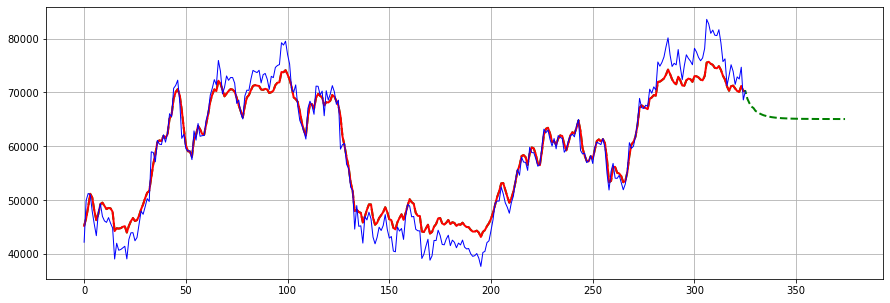

In [1331]:
plt.figure(figsize=(15,5))
plt.plot(scaler3.inverse_transform(full_btc[1:]),c='green',linestyle='--',linewidth=2)
plt.plot(scaler3.inverse_transform(pred_btc[1:]),c='red',linewidth=2)
plt.plot(scaler3.inverse_transform(target_btc_s2),c='blue',linewidth=1)
plt.grid()
plt.show()

# Enumerate the predictions to see the daily results

In [1332]:
future_dates=scaler3.inverse_transform(future_btc)

In [1333]:
#observations the dip will continue till dat 8th
#recommendations try differnt LSTM models and do a committee voting\
#from many results to provide your final recommendations

In [1334]:
for count, value in enumerate(future_dates):
    print("Day",count, "BTC in CAD",value)
    

Day 0 BTC in CAD 70286.66433237985
Day 1 BTC in CAD 68838.63991140129
Day 2 BTC in CAD 68019.4527204136
Day 3 BTC in CAD 67390.30409057229
Day 4 BTC in CAD 67122.24021544731
Day 5 BTC in CAD 66585.16843992264
Day 6 BTC in CAD 66353.75375738821
Day 7 BTC in CAD 66114.53745044577
Day 8 BTC in CAD 65929.52134562482
Day 9 BTC in CAD 65775.28242990423
Day 10 BTC in CAD 65664.64780731694
Day 11 BTC in CAD 65564.66351310916
Day 12 BTC in CAD 65487.531584138356
Day 13 BTC in CAD 65423.265306269364
Day 14 BTC in CAD 65370.376460314124
Day 15 BTC in CAD 65325.875003048626
Day 16 BTC in CAD 65289.095052753895
Day 17 BTC in CAD 65257.887799297
Day 18 BTC in CAD 65231.5971866824
Day 19 BTC in CAD 65209.27654424828
Day 20 BTC in CAD 65190.298537344526
Day 21 BTC in CAD 65174.0860936755
Day 22 BTC in CAD 65160.2322015435
Day 23 BTC in CAD 65148.35479147185
Day 24 BTC in CAD 65138.162115057
Day 25 BTC in CAD 65129.401726789125
Day 26 BTC in CAD 65121.86237361437
Day 27 BTC in CAD 65115.369082073084
Da